In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses,Model
from random import randint


In [2]:
(x_train, _), (x_test, _)=tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [4]:
# Encoder
hidden_size = 128
latent_size = 20

input_layer = layers.Input(shape=x_train.shape[1:])
flattened = layers.Flatten()(input_layer)
hidden = layers.Dense(hidden_size, activation='relu')(flattened)
latent = layers.Dense(latent_size, activation='tanh')(hidden)
encoder = Model(inputs=input_layer, outputs=latent, name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,060 (402.58 KB)

 Trainable params: 103,060 (402.58 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Decoder
input_layer_decoder = layers.Input(shape=encoder.output.shape[1:])
upsampled = layers.Dense(hidden_size, activation='relu')(input_layer_decoder)
target_shape = np.prod(x_train.shape[1:])  # Total number of elements in the original input shape
upsampled = layers.Dense(target_shape, activation='sigmoid')(upsampled)
constructed = layers.Reshape(x_train.shape[1:])(upsampled)
decoder = models.Model(inputs=input_layer_decoder, outputs=constructed, name='decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,824 (405.56 KB)

 Trainable params: 103,824 (405.56 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Autoencoder
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28)         │       103,824 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,884 (808.14 KB)

 Trainable params: 206,884 (808.14 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(
    x_train, x_train,
    epochs=150,
    batch_size=64,
    validation_data=(x_test, x_test),
    verbose=1
)


Epoch 1/150


I0000 00:00:1734198796.473996      94 service.cc:145] XLA service 0x7c78700043a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734198796.474073      94 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734198796.474080      94 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


105/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1314

I0000 00:00:1734198797.993929      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0769 - val_loss: 0.0606
Epoch 2/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0604 - val_loss: 0.0602
Epoch 3/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0601 - val_loss: 0.0596
Epoch 4/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0589 - val_loss: 0.0541
Epoch 5/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0531 - val_loss: 0.0471
Epoch 6/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0406 - val_loss: 0.0335
Epoch 7/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0331 - val_loss: 0.0298
Epoch 8/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0286 - val_loss: 0.0244
Epoch 9/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0239 - val_loss: 0.0207
Epoch 10/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0204 - val_loss: 0.0180
Epoch 11/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0180 - val_loss: 0.0163
Epoch 12/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

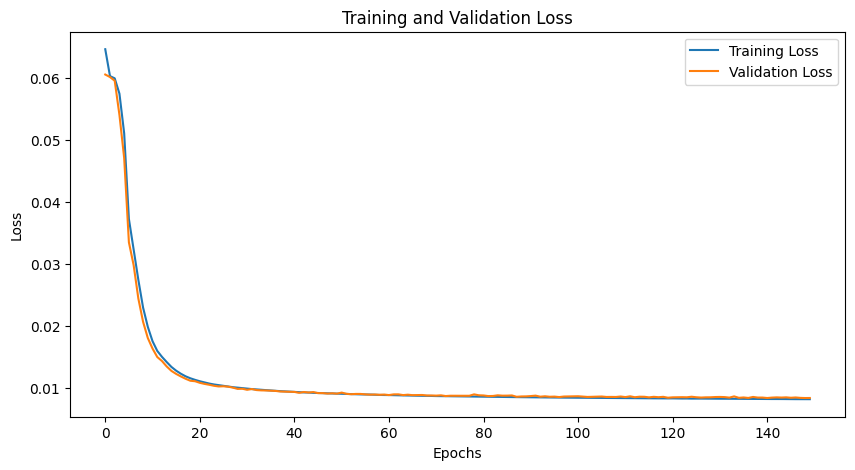

In [8]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


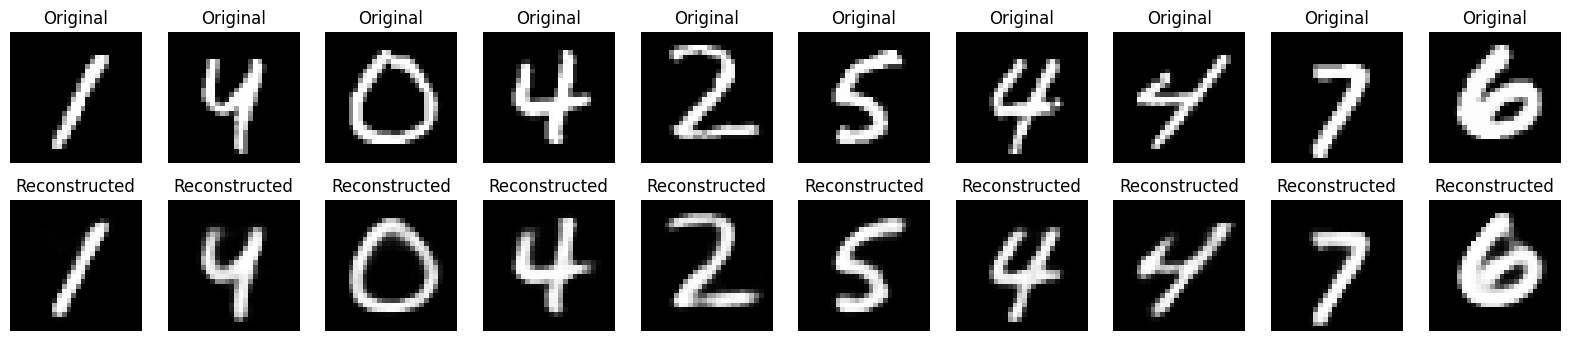

In [20]:
# Visualize reconstructed images
n = 10  # Number of samples to display
indices = np.random.choice(range(len(x_test)), n, replace=False)
test_samples = x_test[indices]
reconstructed_samples = autoencoder.predict(test_samples)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_samples[i], cmap='gray')
    plt.title("Original")
    plt.axis("off")
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_samples[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


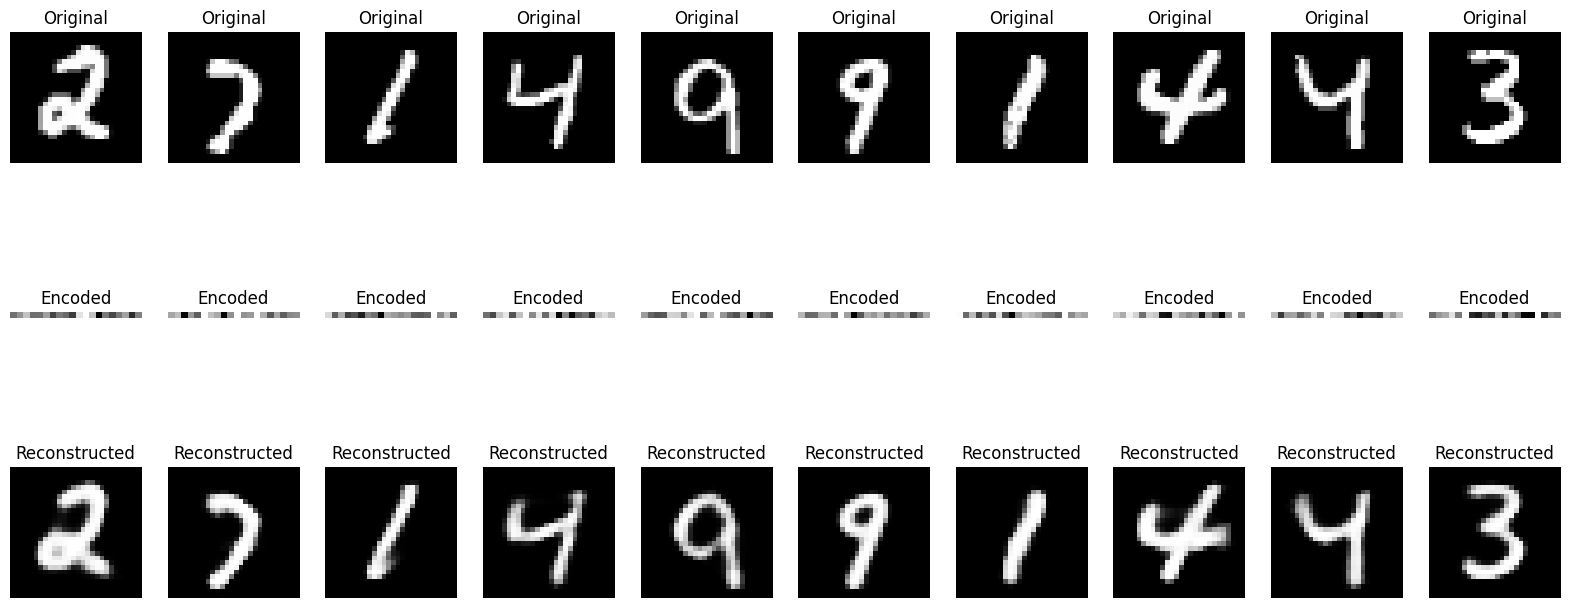

In [21]:
# Visualize encoding and decoding steps
n = 10  # Number of samples to display
indices = np.random.choice(range(len(x_test)), n, replace=False)
test_samples = x_test[indices]
encoded_samples = encoder.predict(test_samples)
reconstructed_samples = autoencoder.predict(test_samples)

plt.figure(figsize=(20, 8))

for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_samples[i], cmap='gray')
    plt.title("Original")
    plt.axis("off")
    
    # Encoded images (latent space)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_samples[i].reshape(1, -1), cmap='gray')  # Show latent vector as a 1D image
    plt.title("Encoded")
    plt.axis("off")
    
    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_samples[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()